In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pickle
#pd.set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)

In [354]:
df =  pd.read_csv('credit_customers.csv')

In [355]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [356]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

## Model Building

In [357]:
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [358]:
#A1
train.reset_index(drop=True, inplace=True)

In [359]:
train.head(2)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,>=200,15.0,existing paid,business,2687.0,<100,4<=X<7,2.0,male single,none,4.0,life insurance,26.0,none,rent,1.0,skilled,1.0,yes,yes,good
1,no checking,60.0,existing paid,new car,6527.0,no known savings,1<=X<4,4.0,male single,none,4.0,no known property,34.0,none,for free,1.0,skilled,2.0,yes,yes,good


In [360]:
print(df.shape)
print(train.shape)
print(test.shape)

(1000, 21)
(800, 21)
(200, 21)


In [361]:
train.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [362]:
train.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [363]:
train.tail(100)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
700,<0,12.0,existing paid,education,795.0,<100,<1,4.0,female div/dep/mar,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,bad
701,0<=X<200,27.0,delayed previously,used car,5965.0,<100,>=7,1.0,male single,none,2.0,car,30.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes,good
702,0<=X<200,12.0,delayed previously,radio/tv,585.0,<100,1<=X<4,4.0,male mar/wid,co applicant,4.0,real estate,20.0,none,rent,2.0,skilled,1.0,none,yes,good
703,<0,24.0,existing paid,used car,2924.0,<100,1<=X<4,3.0,male single,guarantor,4.0,no known property,63.0,bank,own,1.0,skilled,2.0,yes,yes,good
704,0<=X<200,36.0,existing paid,education,2273.0,<100,4<=X<7,3.0,male single,none,1.0,car,32.0,none,own,2.0,skilled,2.0,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,<0,24.0,existing paid,used car,6579.0,<100,unemployed,4.0,male single,none,2.0,no known property,29.0,none,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
796,<0,24.0,existing paid,used car,2910.0,<100,4<=X<7,2.0,male single,none,1.0,no known property,34.0,none,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
797,no checking,22.0,existing paid,new car,1283.0,no known savings,4<=X<7,4.0,female div/dep/mar,none,4.0,life insurance,25.0,none,rent,1.0,skilled,1.0,none,yes,good
798,no checking,12.0,existing paid,business,1542.0,<100,4<=X<7,2.0,male single,none,4.0,car,36.0,none,own,1.0,skilled,1.0,yes,yes,good


In [364]:
train['existing_credits'].unique()

array([1., 3., 2., 4.])

In [365]:
#A2
cols_to_convert = ['duration', 'credit_amount', 'credit_amount', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'installment_commitment']

for col in cols_to_convert:
    train[col] = train[col].astype(int)


In [366]:
train.dtypes

checking_status           object
duration                   int32
credit_history            object
purpose                   object
credit_amount              int32
savings_status            object
employment                object
installment_commitment     int32
personal_status           object
other_parties             object
residence_since            int32
property_magnitude        object
age                        int32
other_payment_plans       object
housing                   object
existing_credits           int32
job                       object
num_dependents             int32
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [367]:
cat = []
for i in train.columns:
    if train[i].dtype =='O':
        cat.append(i)

In [368]:
cat

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [369]:
train.duplicated().sum()

0

In [370]:
for i in cat:
    if train[i].dtype == 'O':
        print(f"{i} has {train[i].nunique()}categories\nThey are:\n{train[i].unique()}\n")

checking_status has 4categories
They are:
['>=200' 'no checking' '<0' '0<=X<200']

credit_history has 5categories
They are:
['existing paid' 'delayed previously' 'critical/other existing credit'
 'no credits/all paid' 'all paid']

purpose has 10categories
They are:
['business' 'new car' 'radio/tv' 'used car' 'education'
 'furniture/equipment' 'domestic appliance' 'other' 'repairs' 'retraining']

savings_status has 5categories
They are:
['<100' 'no known savings' '500<=X<1000' '100<=X<500' '>=1000']

employment has 5categories
They are:
['4<=X<7' '1<=X<4' '>=7' 'unemployed' '<1']

personal_status has 4categories
They are:
['male single' 'male mar/wid' 'female div/dep/mar' 'male div/sep']

other_parties has 3categories
They are:
['none' 'co applicant' 'guarantor']

property_magnitude has 4categories
They are:
['life insurance' 'no known property' 'car' 'real estate']

other_payment_plans has 3categories
They are:
['none' 'stores' 'bank']

housing has 3categories
They are:
['rent' 'for fr

In [371]:
col = train.columns

In [372]:
col

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [373]:
#A3
X_train = train.drop(['class'], axis=1)
y_train = train['class']

X_train1 = X_train.copy()
to have a copy of your feature variable to perform EDA on and also incase you mess up the initial data during EDA

In [374]:
cat1 = []
for i in X_train.columns:
    if X_train[i].dtype =='O':
        cat1.append(i)

In [375]:
cat1

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [376]:
#A4
encoder = OneHotEncoder(drop='first',dtype=int)
enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
enc_data.columns = encoder.get_feature_names_out()
X_train = X_train.join(enc_data)
X_train.drop(cat1,axis=1,inplace=True)

In [377]:
X_train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,15,2687,2,4,26,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,1
1,60,6527,4,4,34,1,2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1
2,12,804,4,4,38,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
3,48,10297,4,4,39,3,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1
4,18,2320,2,3,34,2,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,24,6579,4,2,29,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1
796,24,2910,2,1,34,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1
797,22,1283,4,4,25,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1
798,12,1542,2,4,36,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1


In [378]:
coll = X_train.columns

In [379]:
#A5
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=coll)

In [380]:
X_train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,0.196429,0.134093,0.333333,1.000000,0.125000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.000000,0.345384,1.000000,1.000000,0.267857,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.142857,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.785714,0.552823,1.000000,1.000000,0.357143,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.250000,0.113899,0.333333,0.666667,0.267857,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.357143,0.348245,1.000000,0.333333,0.178571,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
796,0.357143,0.146363,0.333333,0.000000,0.267857,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
797,0.321429,0.056839,1.000000,1.000000,0.107143,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
798,0.142857,0.071091,0.333333,1.000000,0.303571,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


<AxesSubplot:>

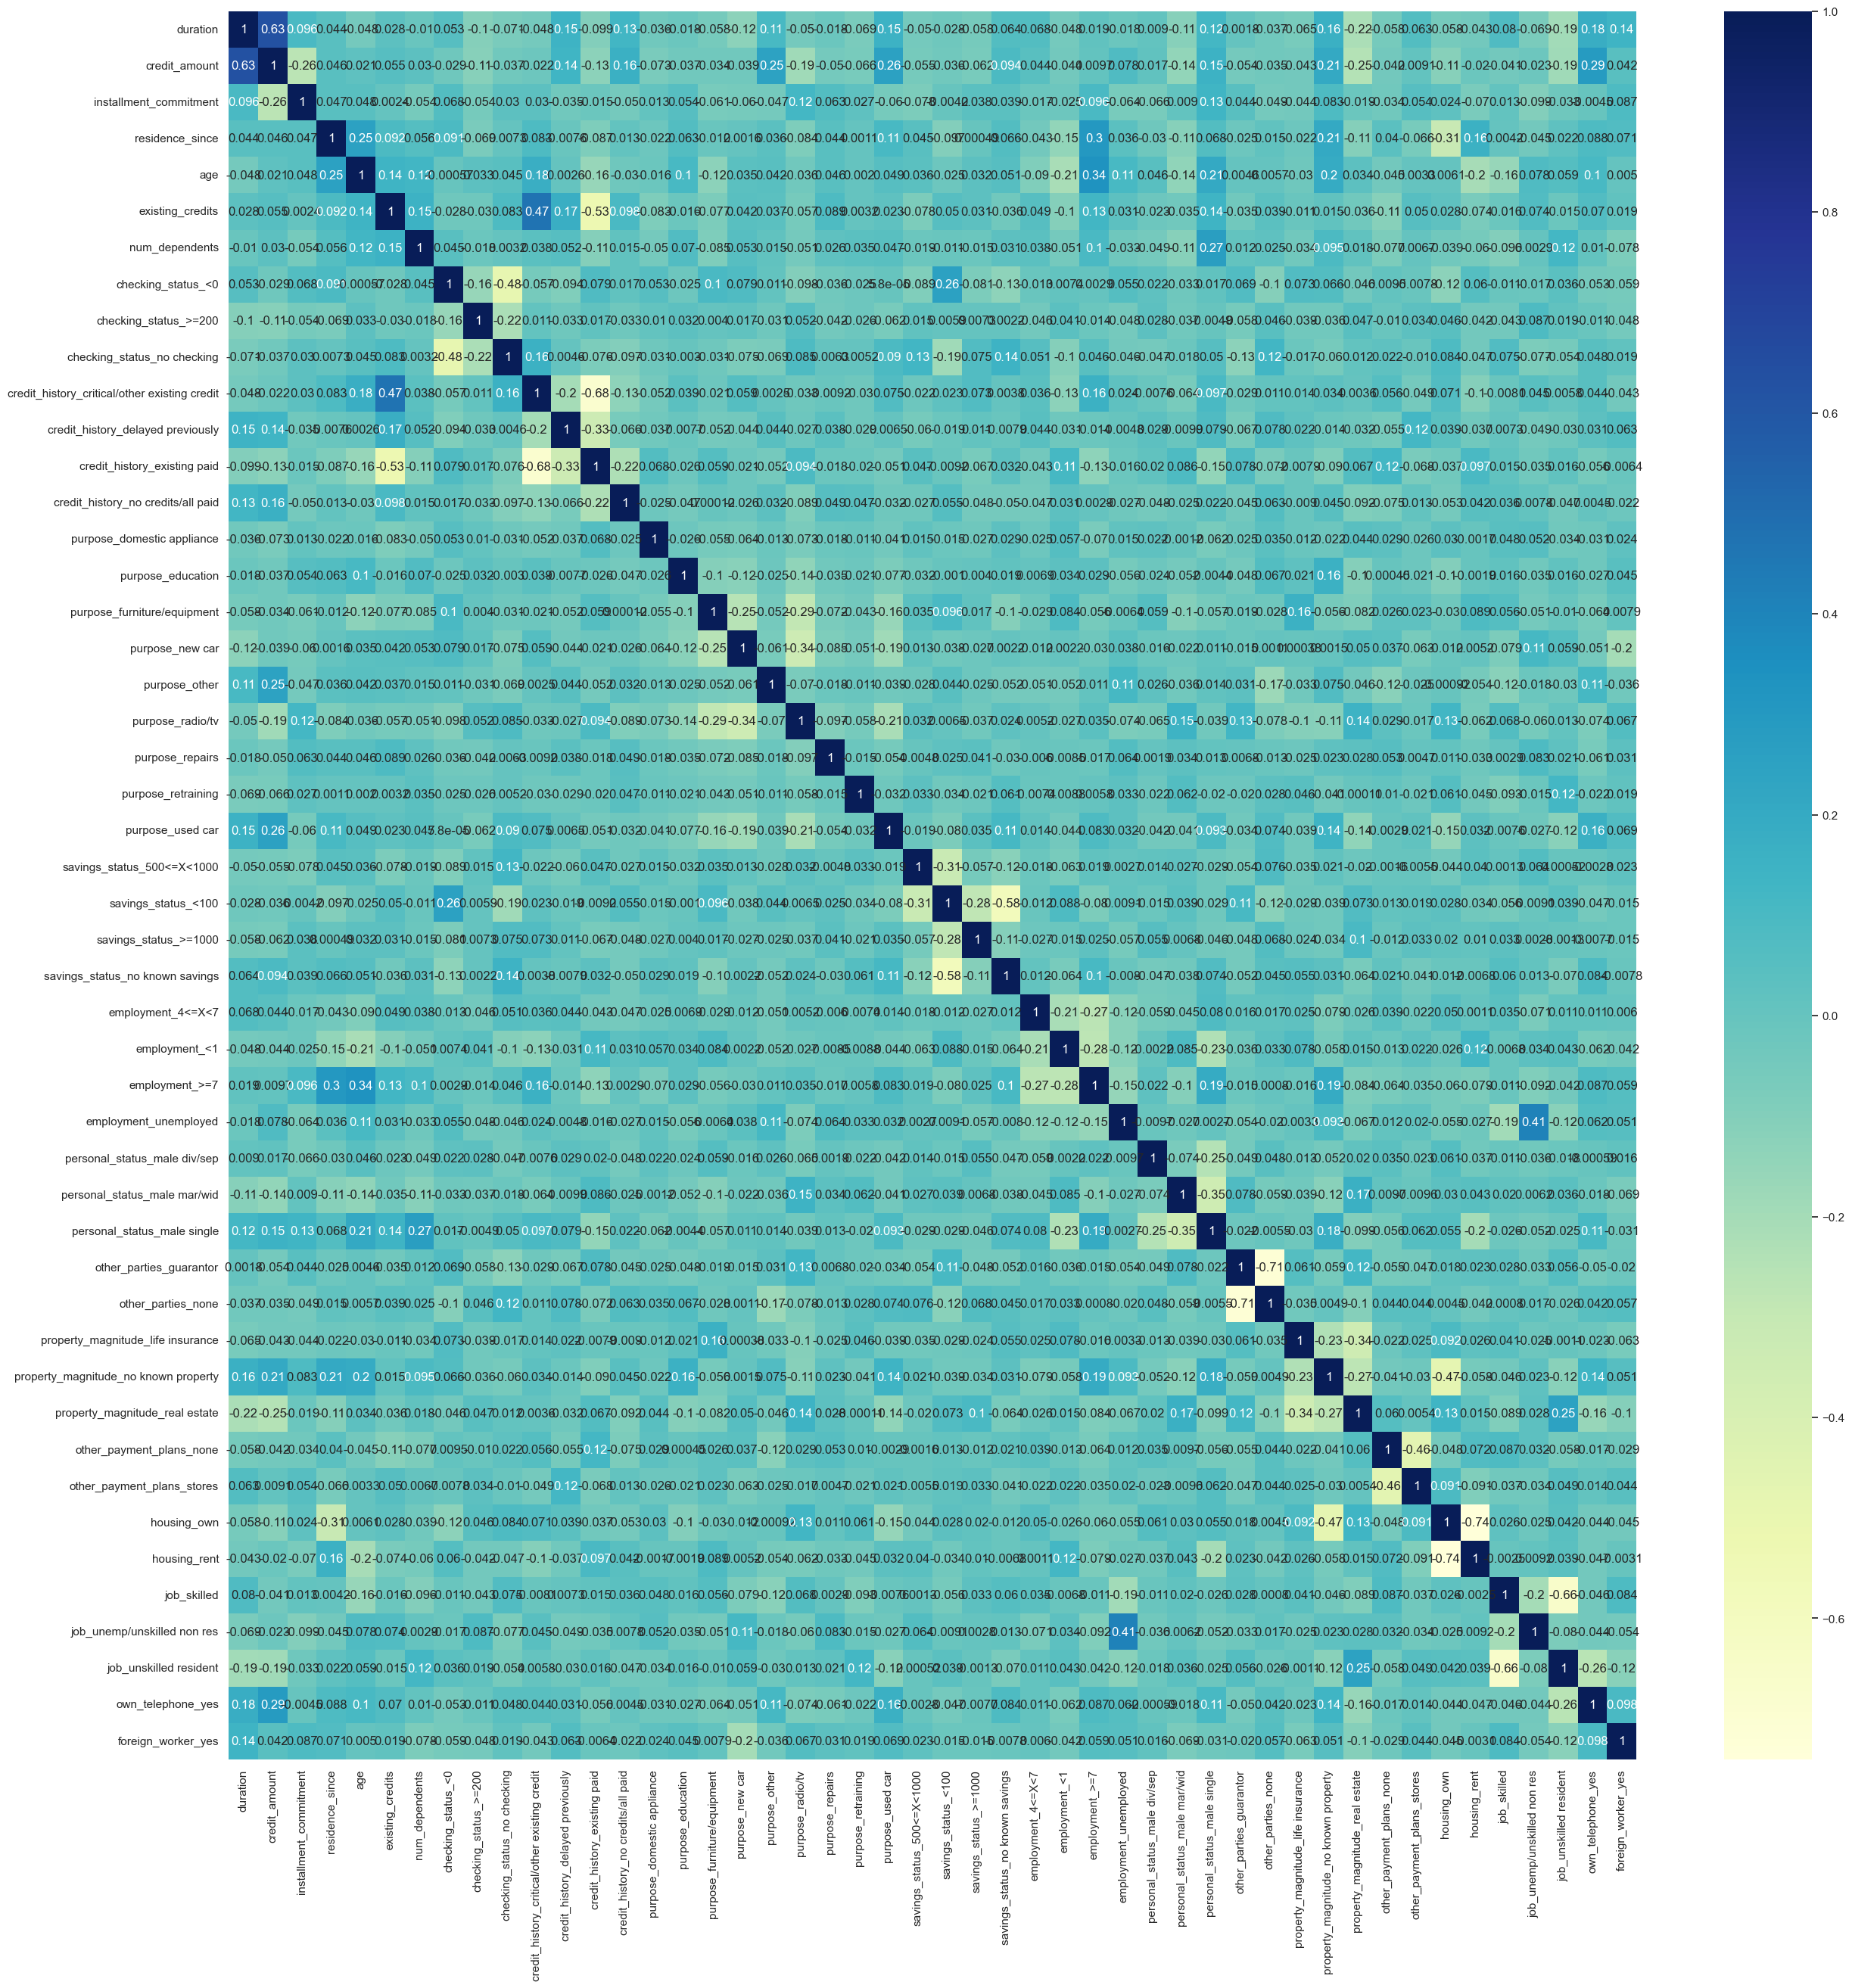

In [381]:
plt.figure(figsize=(30, 30))
cors = X_train.corr()
sns.heatmap(cors, annot=True, cmap="YlGnBu")

<AxesSubplot:>

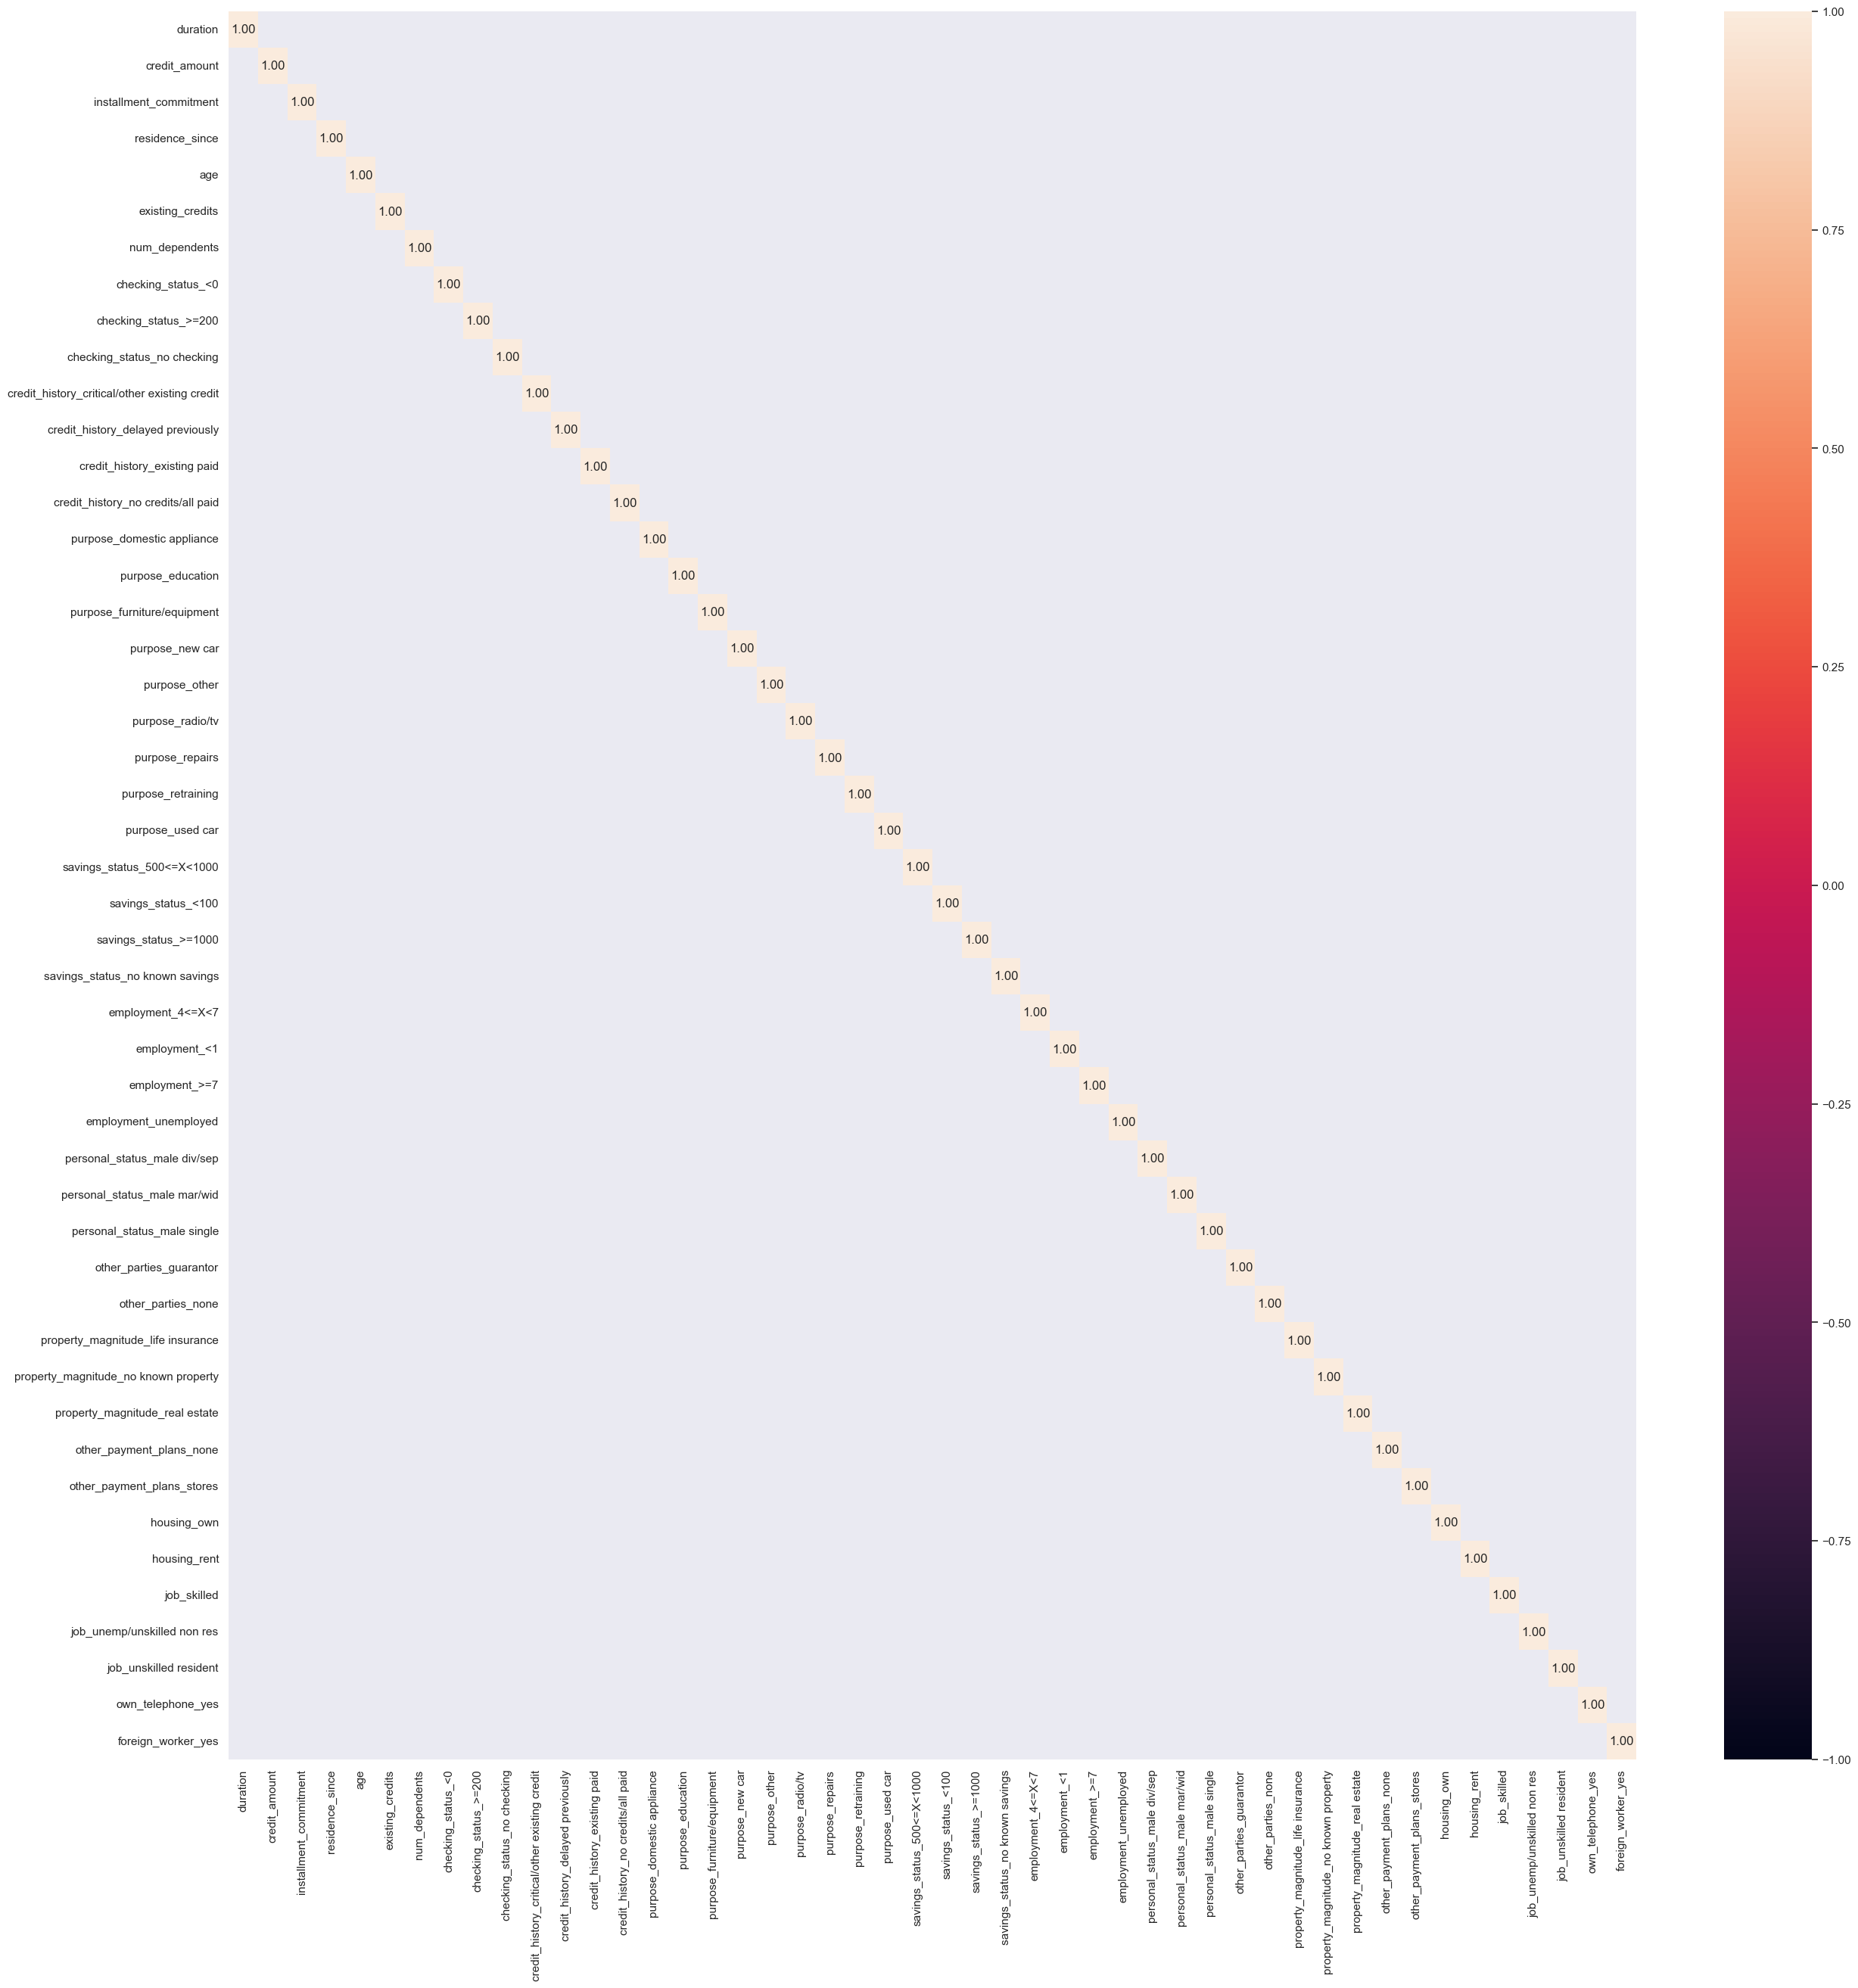

In [382]:
mask = cors[(cors>=0.85)|(cors<=-0.85)]
plt.figure(figsize=(30,30))
sns.heatmap(mask,vmin=-1,annot=True,fmt='0.2f')

In [383]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = coll

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
credit_amount,0.131975
age,0.127629
duration,0.115074
checking_status_no checking,0.111128
job_skilled,0.040522
residence_since,0.040443
existing_credits,0.034299
property_magnitude_real estate,0.028302
housing_own,0.027262
credit_history_existing paid,0.026558


In [385]:
def prepare(df):
    df.reset_index(drop=True, inplace=True)
    cols_to_convert = ['duration', 'credit_amount', 'credit_amount', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'installment_commitment']

    for col in cols_to_convert:
        df[col] = df[col].astype(int)
    
    X_test = df.drop(['class'], axis=1)
    y_test = df['class']
    
    cat1 = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
    
    enc_data = pd.DataFrame(encoder.transform(X_test[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out()
    X_test = X_test.join(enc_data)
    X_test.drop(cat1,axis=1,inplace=True)
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test,columns=coll)
    
    return X_test,y_test


In [386]:
X_test, y_test = prepare(test)

In [388]:
X_test

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,0.571429,0.365192,1.000000,0.666667,0.178571,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.142857,0.035875,1.000000,1.000000,0.035714,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.357143,0.114614,1.000000,0.333333,0.178571,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.250000,0.098437,0.000000,1.000000,0.017857,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.196429,0.136349,1.000000,0.333333,0.285714,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.464286,0.197095,0.333333,0.000000,0.053571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
196,0.035714,0.004842,1.000000,1.000000,0.589286,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
197,0.785714,0.548696,1.000000,0.666667,0.321429,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
198,0.089286,0.155387,0.000000,0.333333,0.250000,0.333333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [389]:
X_test.dtypes

duration                                         float64
credit_amount                                    float64
installment_commitment                           float64
residence_since                                  float64
age                                              float64
existing_credits                                 float64
num_dependents                                   float64
checking_status_<0                               float64
checking_status_>=200                            float64
checking_status_no checking                      float64
credit_history_critical/other existing credit    float64
credit_history_delayed previously                float64
credit_history_existing paid                     float64
credit_history_no credits/all paid               float64
purpose_domestic appliance                       float64
purpose_education                                float64
purpose_furniture/equipment                      float64
purpose_new car                

In [390]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [391]:
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d', 
    
 )

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show()


 Accuracy Score : 
  0.67

 AUC Score : 
 0.6154027597594056

 Confusion Matrix : 
  [[ 29  32]
 [ 34 105]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.46      0.48      0.47        61
        good       0.77      0.76      0.76       139

    accuracy                           0.67       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.67      0.67      0.67       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


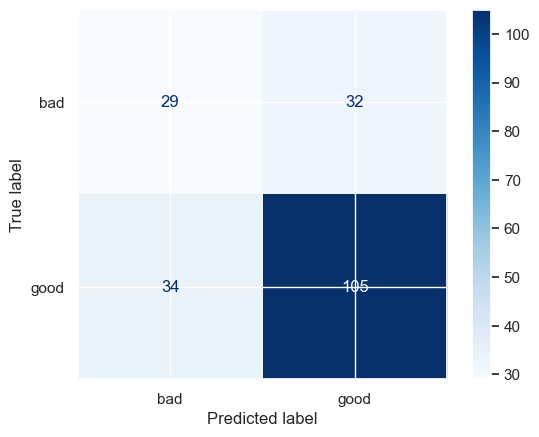

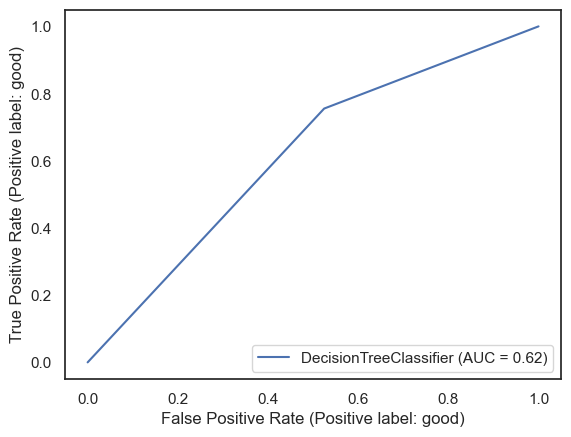

In [392]:
model1 = model_to_use("DT")

model1.fit(X_train, y_train)
performance(model1,X_train,y_train,X_test,y_test)


 Accuracy Score : 
  0.785

 AUC Score : 
 0.8493336478358297

 Confusion Matrix : 
  [[ 29  32]
 [ 11 128]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.72      0.48      0.57        61
        good       0.80      0.92      0.86       139

    accuracy                           0.79       200
   macro avg       0.76      0.70      0.72       200
weighted avg       0.78      0.79      0.77       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


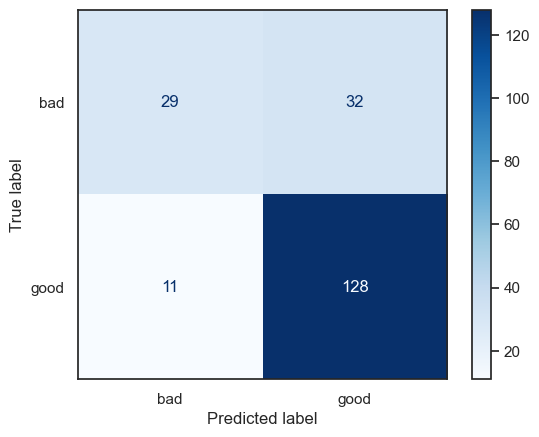

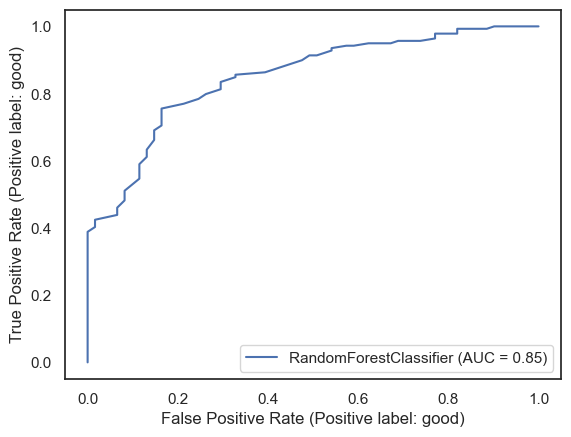

In [393]:
# Best model
model2 = model_to_use("RF")

model2.fit(X_train, y_train)
performance(model2,X_train,y_train,X_test,y_test)


 Accuracy Score : 
  0.79

 AUC Score : 
 0.8403113574713998

 Confusion Matrix : 
  [[ 36  25]
 [ 17 122]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.68      0.59      0.63        61
        good       0.83      0.88      0.85       139

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.78      0.79      0.79       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


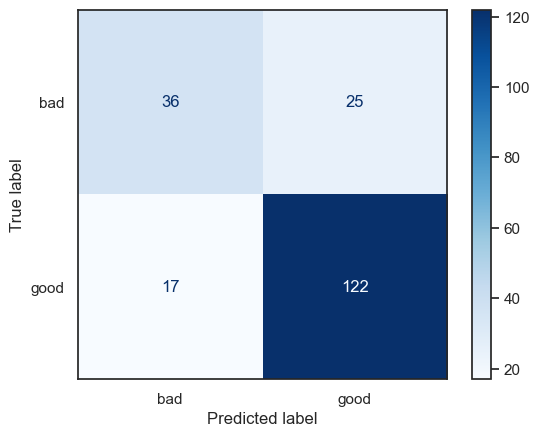

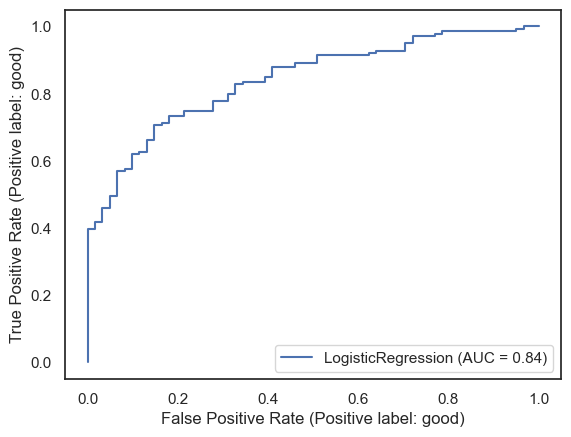

In [394]:
model3 = model_to_use("LR")

model3.fit(X_train, y_train)
performance(model3,X_train,y_train,X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`


 Accuracy Score : 
  0.755

 AUC Score : 
 0.7605849746432363

 Confusion Matrix : 
  [[ 29  32]
 [ 17 122]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.63      0.48      0.54        61
        good       0.79      0.88      0.83       139

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.74       200


 ROC curve : 



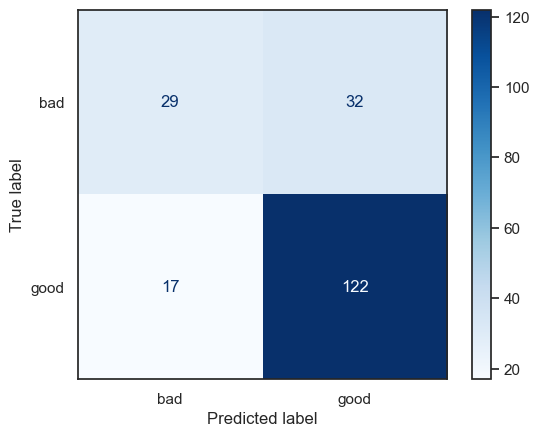

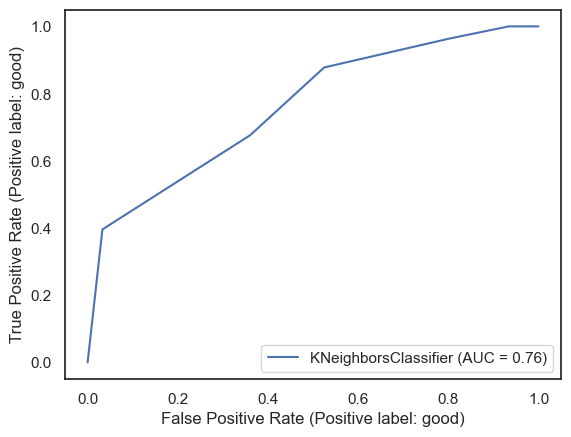

In [395]:
model4 = model_to_use("KNN")

model4.fit(X_train, y_train)
performance(model4,X_train,y_train,X_test,y_test)


 Accuracy Score : 
  0.795

 AUC Score : 
 0.8450288949168534

 Confusion Matrix : 
  [[ 36  25]
 [ 16 123]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.69      0.59      0.64        61
        good       0.83      0.88      0.86       139

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.79      0.80      0.79       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


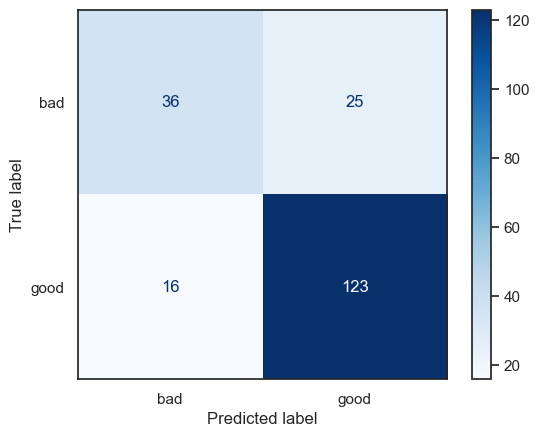

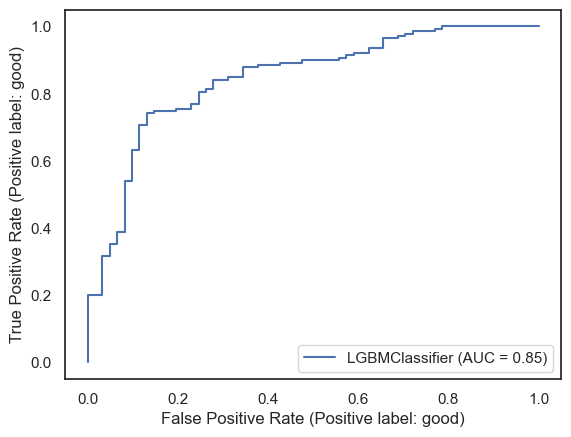

In [396]:
model5 = model_to_use("LGBMC")

model5.fit(X_train, y_train)
performance(model5,X_train,y_train,X_test,y_test)

In [397]:
y_train.value_counts()


good    561
bad     239
Name: class, dtype: int64

In [398]:

from imblearn.over_sampling import RandomOverSampler

In [399]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [400]:
y_ros.value_counts()

good    561
bad     561
Name: class, dtype: int64


 Accuracy Score : 
  0.77

 AUC Score : 
 0.8473876636395802

 Confusion Matrix : 
  [[ 36  25]
 [ 21 118]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.63      0.59      0.61        61
        good       0.83      0.85      0.84       139

    accuracy                           0.77       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.77      0.77      0.77       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


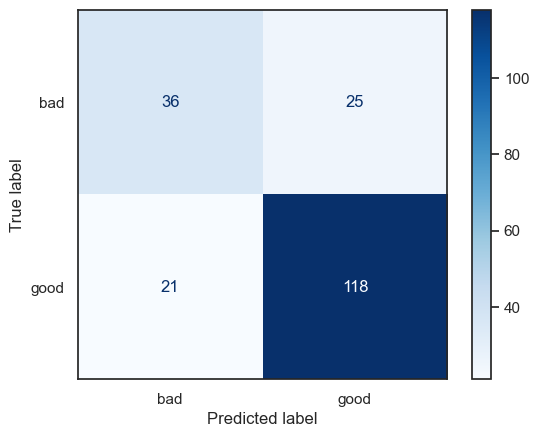

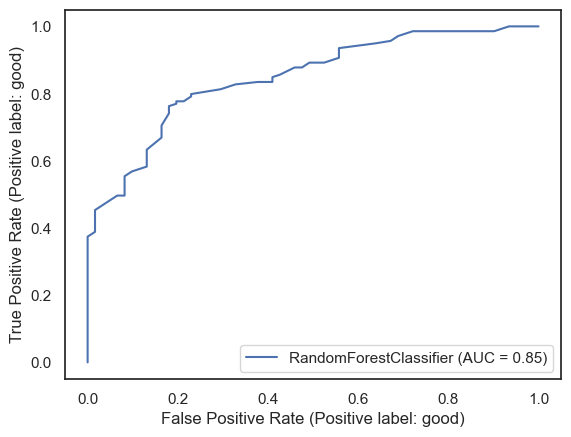

In [401]:
model6 = model_to_use("RF")

model6.fit(X_ros, y_ros)
performance(model6,X_ros,y_ros,X_test,y_test)


 Accuracy Score : 
  0.675

 AUC Score : 
 0.6327986790895153

 Confusion Matrix : 
  [[ 32  29]
 [ 36 103]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.47      0.52      0.50        61
        good       0.78      0.74      0.76       139

    accuracy                           0.68       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.69      0.68      0.68       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


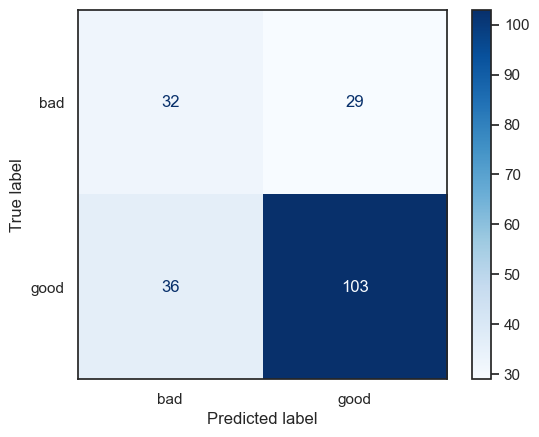

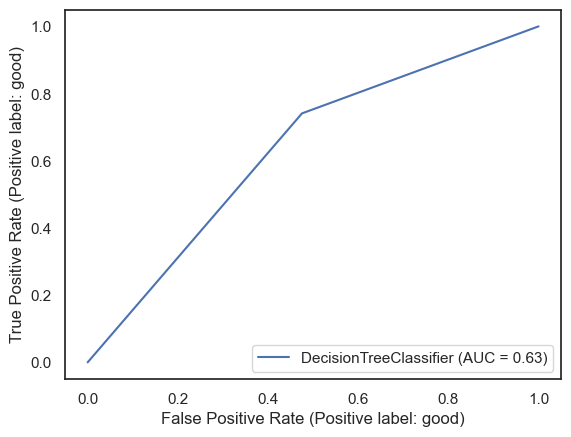

In [402]:
model7 = model_to_use("DT")

model7.fit(X_ros, y_ros)
performance(model7,X_ros,y_ros,X_test,y_test)


 Accuracy Score : 
  0.735

 AUC Score : 
 0.8300507135275387

 Confusion Matrix : 
  [[49 12]
 [41 98]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.54      0.80      0.65        61
        good       0.89      0.71      0.79       139

    accuracy                           0.73       200
   macro avg       0.72      0.75      0.72       200
weighted avg       0.79      0.73      0.75       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


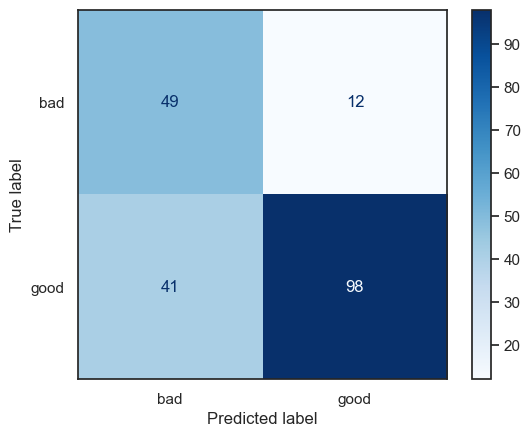

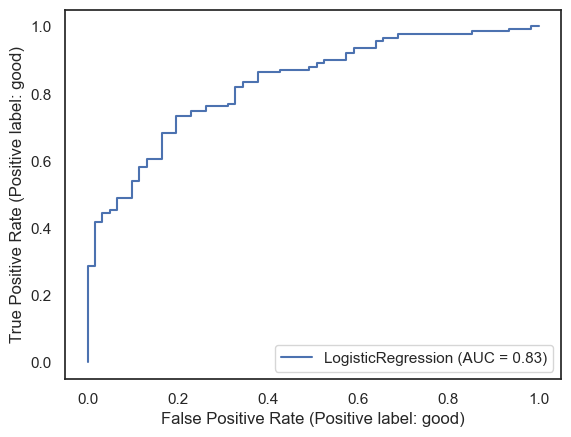

In [403]:
model8 = model_to_use("LR")

model8.fit(X_ros, y_ros)
performance(model8,X_ros,y_ros,X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`


 Accuracy Score : 
  0.65

 AUC Score : 
 0.7311593348272203

 Confusion Matrix : 
  [[41 20]
 [50 89]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.45      0.67      0.54        61
        good       0.82      0.64      0.72       139

    accuracy                           0.65       200
   macro avg       0.63      0.66      0.63       200
weighted avg       0.70      0.65      0.66       200


 ROC curve : 



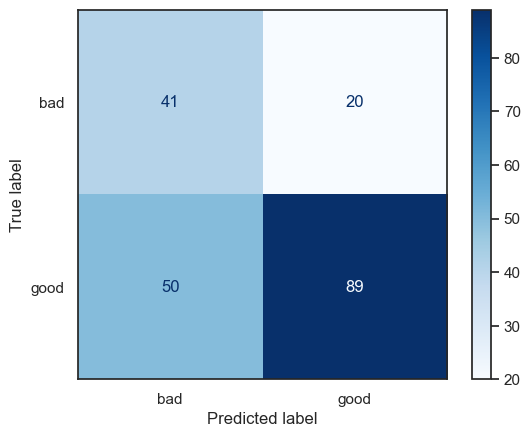

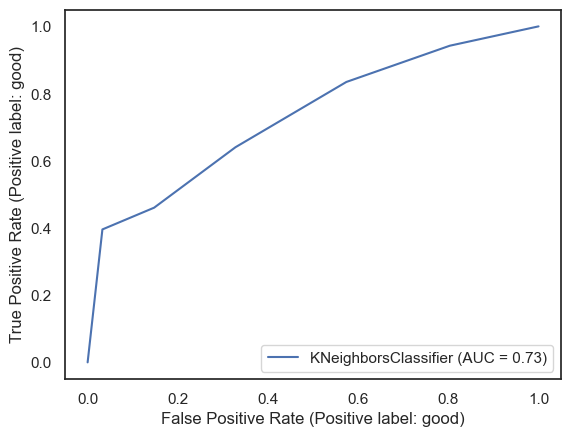

In [404]:
model9 = model_to_use("KNN")

model9.fit(X_ros, y_ros)
performance(model9,X_ros,y_ros,X_test,y_test)


 Accuracy Score : 
  0.79

 AUC Score : 
 0.829107206038448

 Confusion Matrix : 
  [[ 39  22]
 [ 20 119]]

 Classification Report : 
               precision    recall  f1-score   support

         bad       0.66      0.64      0.65        61
        good       0.84      0.86      0.85       139

    accuracy                           0.79       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.79      0.79      0.79       200


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


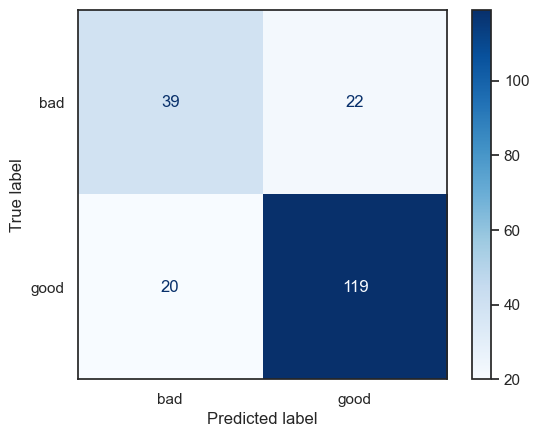

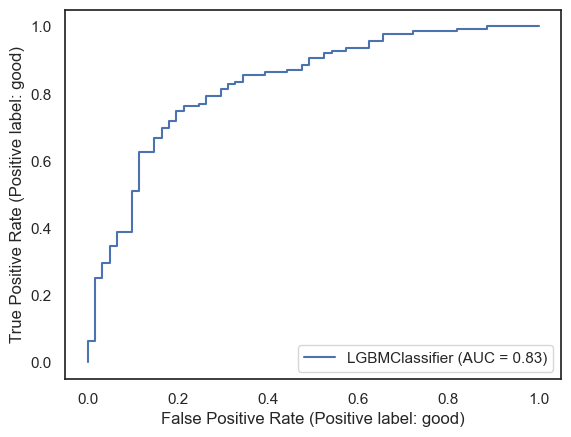

In [405]:
model10 = model_to_use("LGBMC")

model10.fit(X_ros, y_ros)
performance(model10,X_ros,y_ros,X_test,y_test)

In [406]:
#pickle.dump(model6, open('RF_model.pkl', 'wb'))
#save the encoder
#pickle.dump(encoder, open('enc_class1.pkl', "wb"))
#save scaler
#pickle.dump(scaler, open('scal_class1.pkl', 'wb'))

In [ ]:
#! streamlit run loan.py